# Apply Visual Assessment of Clustering Tendency (VAT) and iVAT Algorithms to Data
Cluster tendency algorithms allow for the assesment of datasets to determine if there are clusters present prior to performing cluster analysis [1]. This information determines if coinducting cluster analysis is necessary or not [1]. There are two main methods of cluster tendency algorithms: statistical and visual. In this study, two common visual methods will be applied, Visual Assessment of Tendency (VAT) and improved VAT (iVAT).
## Methods
VAT, a visual method of cluster tendency, is an algorithm that determines the number of clusters within the dataset and if cluster hierachies exist in the data [1]. VAT creates a minimum spanning tree of observations and the pairwise distance between the observations are shown as black squares on the map [1]. Clusters and cluster hierachies are shown by densely black squares across the left diagonal of a squared-sized map in most cases [1].

Another visual cluster tendency method is iVAT. This method is an improved version of VAT. It provides clearly dense black squares and is more precise than the original VAT [1]. Same as the VAT algorithm, black square images representing clusters form in a diagonal in most cases [1]. In this study, both VAT and iVAT algorithms are applied to two seperate datasets to determine the amount of clusters present in the data. A flowchart of the basic process for both algorithms used in this report is shown below.

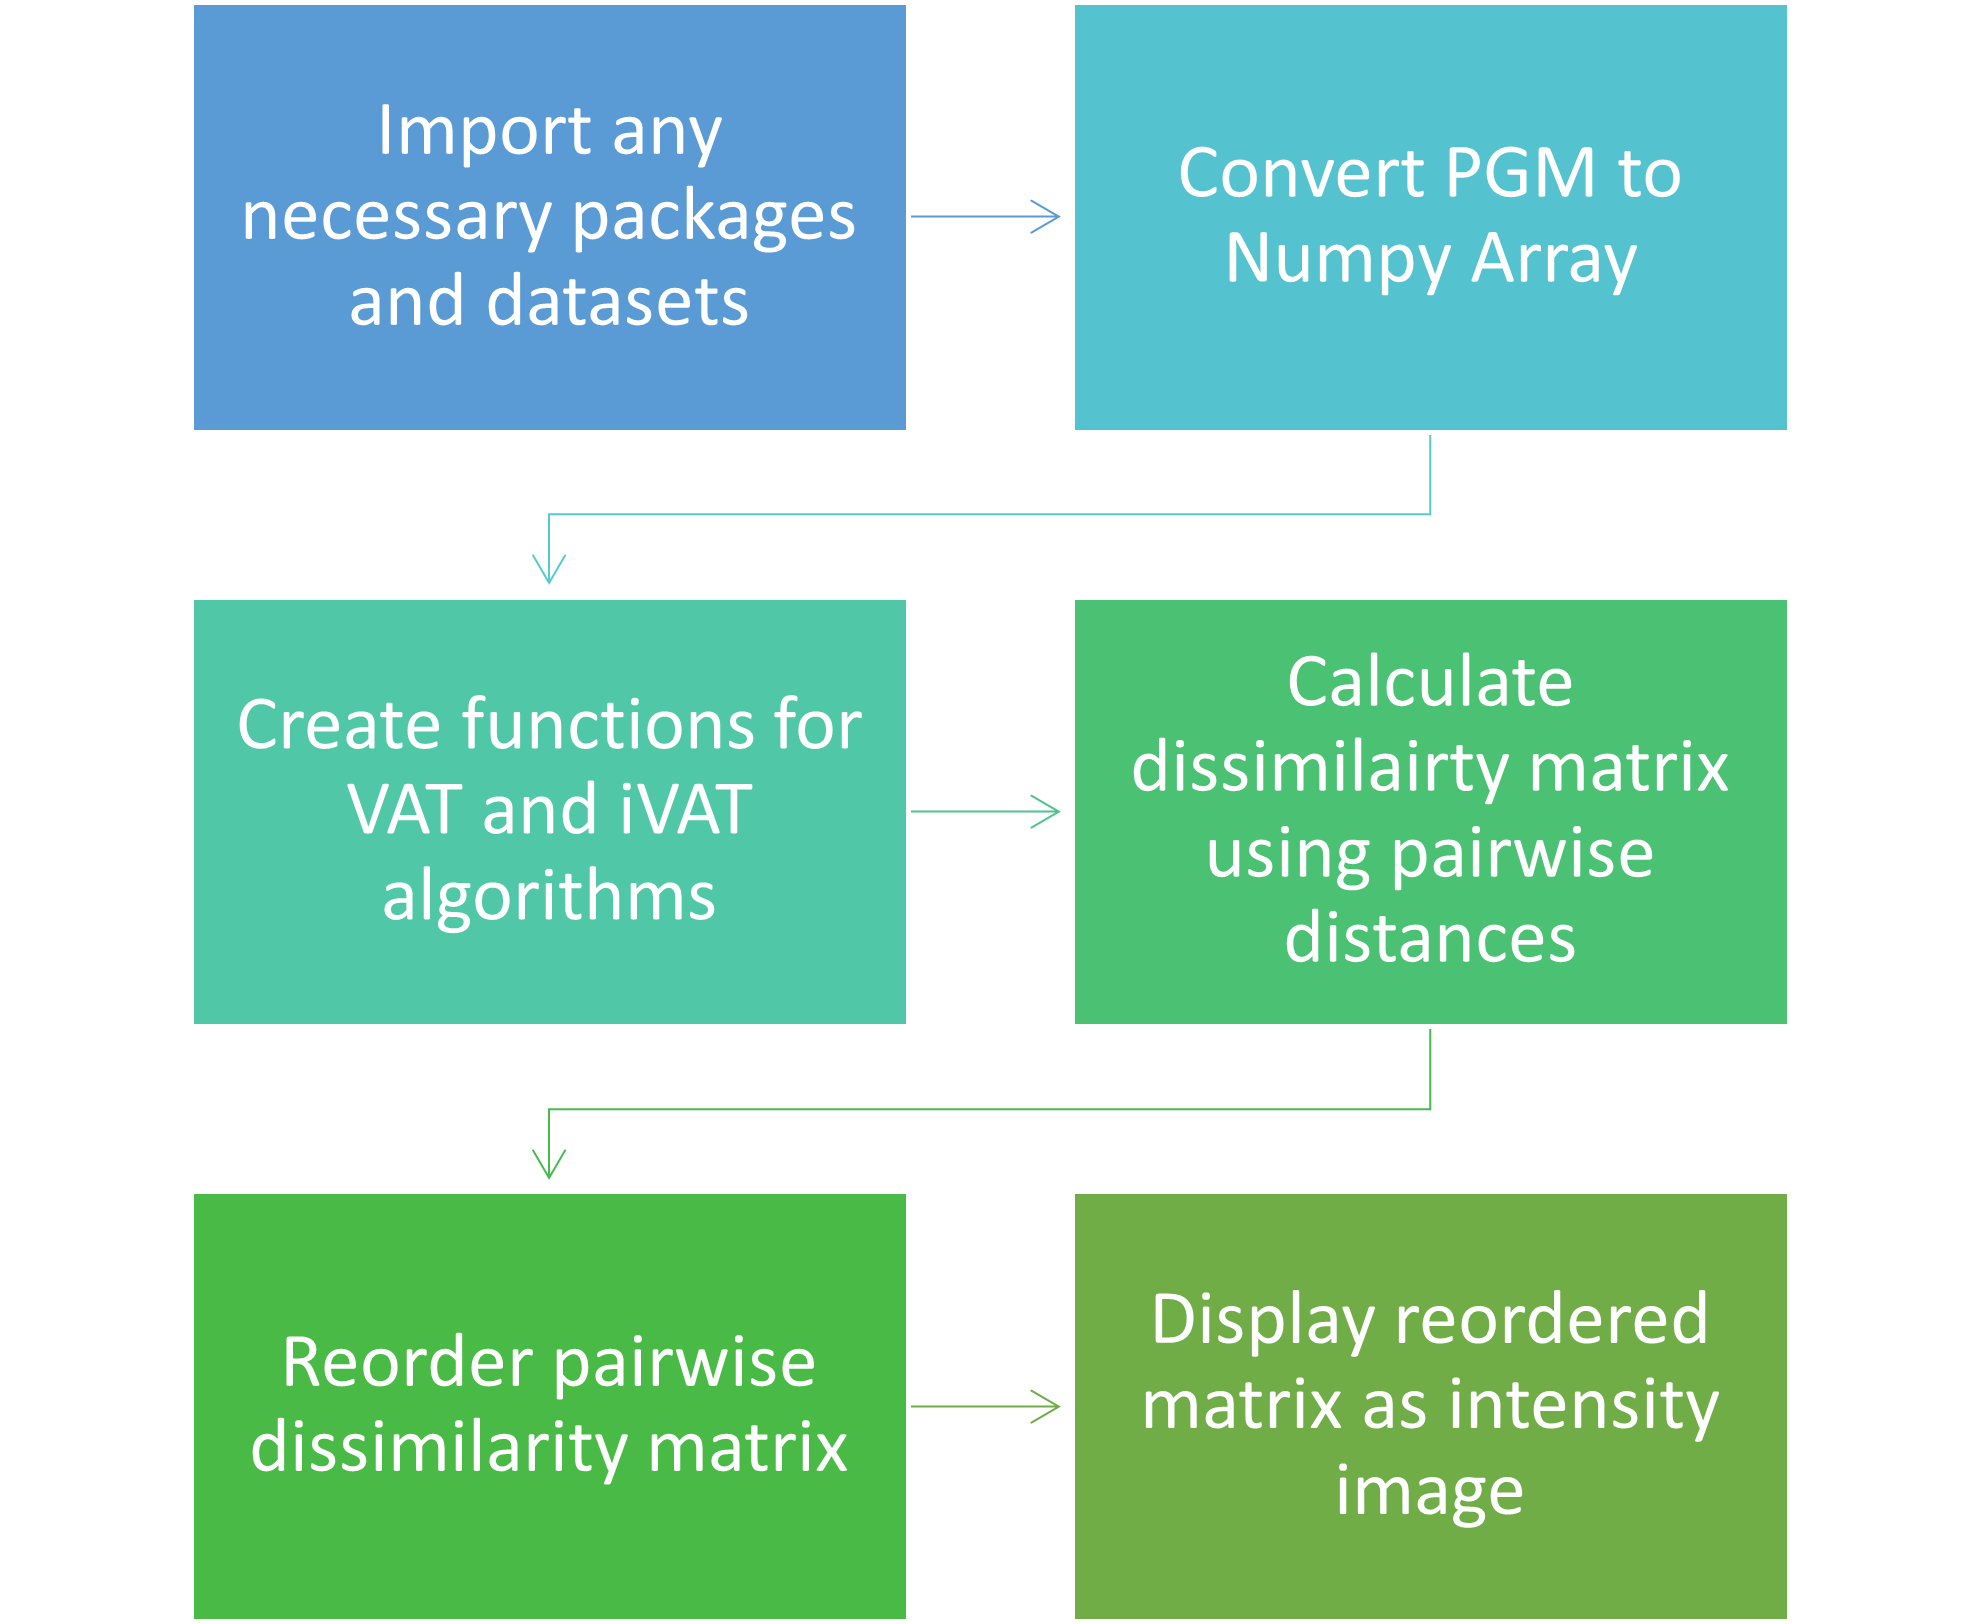



Analysis of 1st Dataset

(256, 256)


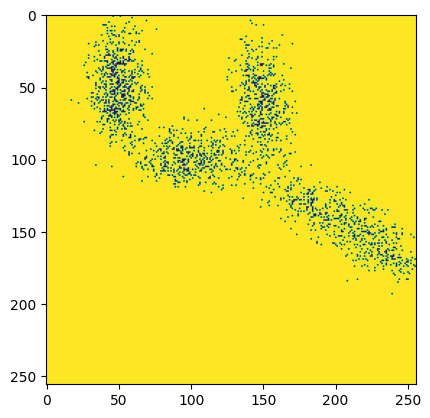

In [ ]:
#Upload first dataset
import matplotlib.pyplot as plt
import numpy as np

#Upload PGM
Image =plt.imread('/4cov.PGM')
print(Image.shape)

plt.imshow(Image);

In [ ]:
#convert PGM to Numpy Array
from numpy import asarray
np_array= np.array(Image)
print(np_array.shape)
print(np_array)

(256, 256)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


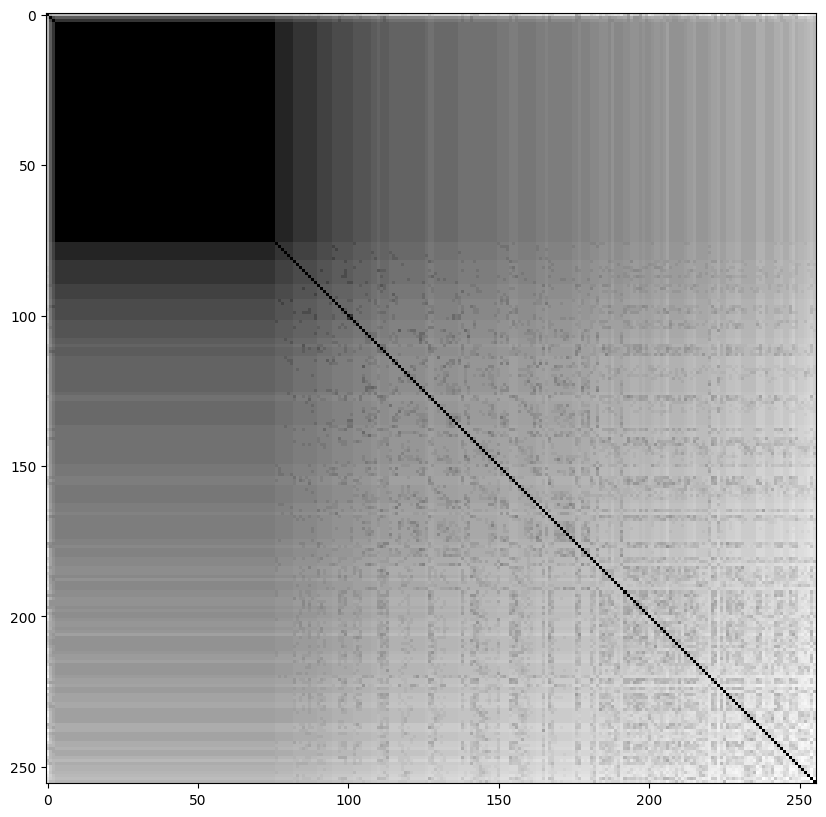

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

#Create VAT function
def vat(np_array, return_odm=False, figure_size=(10, 10)):

    ordered_ds_matrix = calc_ordered_ds_matrix(np_array)

    _, ax = plt.subplots(figsize=figure_size)
    ax.imshow(ordered_ds_matrix, cmap='gray', vmin=0, vmax=np.max(ordered_ds_matrix))

    if return_odm is True:
        return ordered_ds_matrix

#Create function to calculate dissimilarity matrix using pairwise distance
def calc_ordered_ds_matrix(X):

    observation_path = []

    matrix_of_pw_distance = pairwise_distances(X)
    list_of_int = np.zeros(matrix_of_pw_distance.shape[0], dtype="int")

    index_of_max_value = np.argmax(matrix_of_pw_distance)

    column_index_of_max_value = index_of_max_value // matrix_of_pw_distance.shape[1]

    list_of_int[0] = column_index_of_max_value
    observation_path.append(column_index_of_max_value)

    K = np.linspace(0, matrix_of_pw_distance.shape[0] - 1, matrix_of_pw_distance.shape[0], dtype="int")
    J = np.delete(K, column_index_of_max_value)


    for r in range(1, matrix_of_pw_distance.shape[0]):

        p, q = (-1, -1)

        mini = np.max(matrix_of_pw_distance)

        for candidate_p in observation_path:
            for candidate_j in J:
                if matrix_of_pw_distance[candidate_p, candidate_j] < mini:
                    p = candidate_p
                    q = candidate_j
                    mini = matrix_of_pw_distance[p, q]

        list_of_int[r] = q
        observation_path.append(q)

        ind_q = np.where(np.array(J) == q)[0][0]
        J = np.delete(J, ind_q)


    ordered_matrix = np.zeros(matrix_of_pw_distance.shape)

    for column_index_of_max_value in range(ordered_matrix.shape[0]):
        for j in range(ordered_matrix.shape[1]):
            ordered_matrix[column_index_of_max_value, j] = matrix_of_pw_distance[
                list_of_int[column_index_of_max_value], list_of_int[j]]


    return ordered_matrix

#Calculate VAT on first dataset
vat_np_array= vat(np_array)




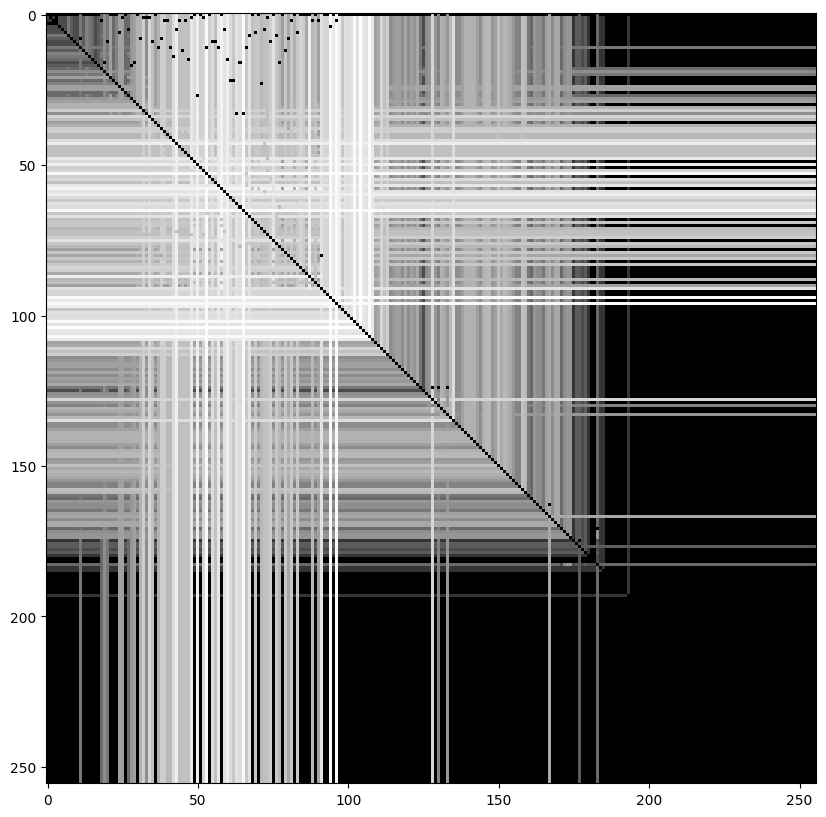

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

#Create function for iVAT
def ivat(np_array, return_odm=False, figure_size=(10, 10)):

    ordered_matrix = compute_ivat_ordered_ds_matrix(np_array)

    _, ax = plt.subplots(figsize=figure_size)
    ax.imshow(ordered_matrix, cmap='gray', vmin=0, vmax=np.max(ordered_matrix))

    if return_odm is True:
        return ordered_matrix


#Create function for calculating the dissimilarity matrix
def compute_ivat_ordered_ds_matrix(X):
    ordered_matrix = pairwise_distances(np_array)
    re_ordered_matrix = np.zeros((ordered_matrix.shape[0], ordered_matrix.shape[0]))

    for r in range(1, ordered_matrix.shape[0]):

        j = np.argmin(ordered_matrix[r, 0:r])

        re_ordered_matrix[r, j] = ordered_matrix[r, j]

        c_tab = np.array(range(0, r))
        c_tab = c_tab[c_tab != j]

        for c in c_tab:
            re_ordered_matrix[r, c] = max(ordered_matrix[r, j], re_ordered_matrix[j, c])
            re_ordered_matrix[c, r] = re_ordered_matrix[r, c]

    return re_ordered_matrix

#Calculate iVAT on first dataset
ivat_np_array= ivat(np_array)

Analysis of Second Dataset

(256, 256)


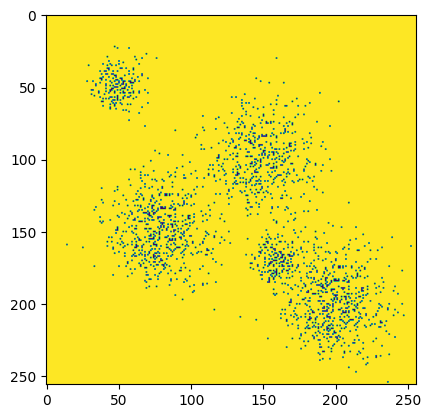

In [ ]:
#import second dataset
import matplotlib.pyplot as plt
import numpy as np

#Upload PGM
Image =plt.imread('/Five_Clust.PGM')
print(Image.shape)

plt.imshow(Image);

In [ ]:
#convert PGM to Numpy Array
from numpy import asarray
np_array_2 = np.array(Image)
print(np_array_2.shape)
print(np_array_2)

(256, 256)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


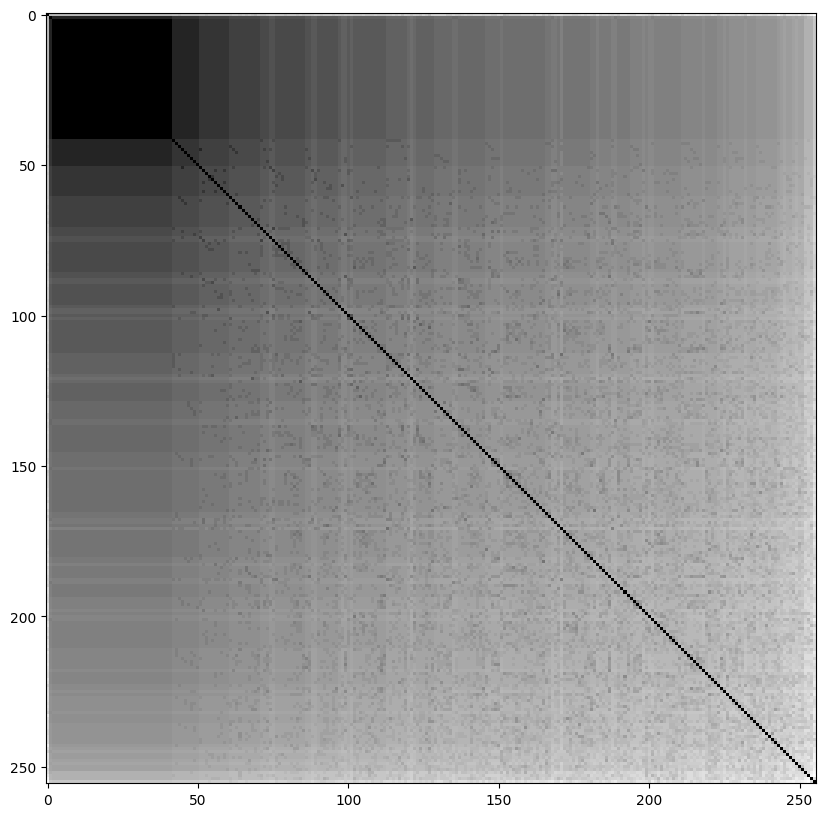

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

#Create VAT function
def vat(np_array_2, return_odm=False, figure_size=(10, 10)):

    ordered_ds_matrix = calc_ordered_ds_matrix(np_array_2)

    _, ax = plt.subplots(figsize=figure_size)
    ax.imshow(ordered_ds_matrix, cmap='gray', vmin=0, vmax=np.max(ordered_ds_matrix))

    if return_odm is True:
        return ordered_ds_matrix

#Create function to calculate dissimilarity matrix using pairwise distance
def calc_ordered_ds_matrix(X):

    observation_path = []

    matrix_of_pw_distance = pairwise_distances(X)
    list_of_int = np.zeros(matrix_of_pw_distance.shape[0], dtype="int")

    index_of_max_value = np.argmax(matrix_of_pw_distance)

    column_index_of_max_value = index_of_max_value // matrix_of_pw_distance.shape[1]

    list_of_int[0] = column_index_of_max_value
    observation_path.append(column_index_of_max_value)

    K = np.linspace(0, matrix_of_pw_distance.shape[0] - 1, matrix_of_pw_distance.shape[0], dtype="int")
    J = np.delete(K, column_index_of_max_value)


    for r in range(1, matrix_of_pw_distance.shape[0]):

        p, q = (-1, -1)

        mini = np.max(matrix_of_pw_distance)

        for candidate_p in observation_path:
            for candidate_j in J:
                if matrix_of_pw_distance[candidate_p, candidate_j] < mini:
                    p = candidate_p
                    q = candidate_j
                    mini = matrix_of_pw_distance[p, q]

        list_of_int[r] = q
        observation_path.append(q)

        ind_q = np.where(np.array(J) == q)[0][0]
        J = np.delete(J, ind_q)


    ordered_matrix = np.zeros(matrix_of_pw_distance.shape)

    for column_index_of_max_value in range(ordered_matrix.shape[0]):
        for j in range(ordered_matrix.shape[1]):
            ordered_matrix[column_index_of_max_value, j] = matrix_of_pw_distance[
                list_of_int[column_index_of_max_value], list_of_int[j]]


    return ordered_matrix

#Calculate VAT on first dataset
vat_np_array_2 = vat(np_array_2)



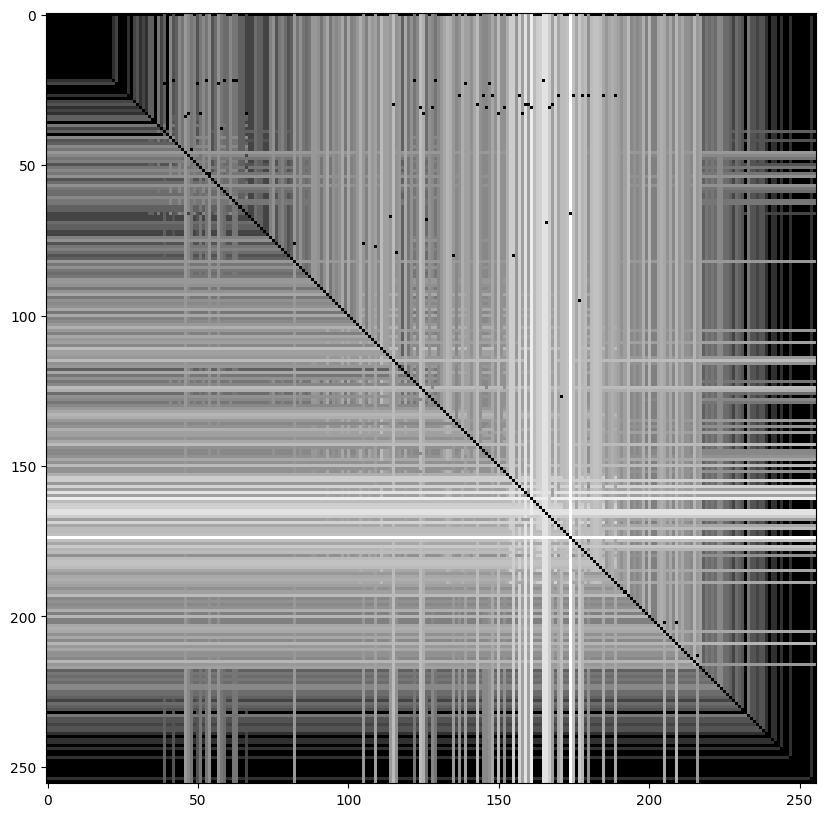

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

#Create function for iVAT
def ivat(np_array_2, return_odm=False, figure_size=(10, 10)):

    ordered_matrix = compute_ivat_ordered_ds_matrix(np_array)

    _, ax = plt.subplots(figsize=figure_size)
    ax.imshow(ordered_matrix, cmap='gray', vmin=0, vmax=np.max(ordered_matrix))

    if return_odm is True:
        return ordered_matrix


#Create function for calculating the dissimilarity matrix
def compute_ivat_ordered_ds_matrix(X):
    ordered_matrix = pairwise_distances(np_array_2)
    re_ordered_matrix = np.zeros((ordered_matrix.shape[0], ordered_matrix.shape[0]))

    for r in range(1, ordered_matrix.shape[0]):

        j = np.argmin(ordered_matrix[r, 0:r])

        re_ordered_matrix[r, j] = ordered_matrix[r, j]

        c_tab = np.array(range(0, r))
        c_tab = c_tab[c_tab != j]

        for c in c_tab:
            re_ordered_matrix[r, c] = max(ordered_matrix[r, j], re_ordered_matrix[j, c])
            re_ordered_matrix[c, r] = re_ordered_matrix[r, c]

    return re_ordered_matrix

#Calculate iVAT on first dataset
ivat_np_array_2 = ivat(np_array_2)

## Results
Based on the results VAT analysis of the 4cov.PGM image, there is only one cluster. This is shown by the dark black box along the diagonal. If there were more clusters, we would expect more dark boxes to be present. The analysis using the iVAT algorithm also showed one large dark box along the diagonal.

The VAT results of the Five_Clust.PGM image also only showed 1 cluster, as shown by the smaller dark black box. The results of the iVAT showed 1 small dark box along the diagonal as well.
## Discussion and Conclusions
Based on the results of the algorithms, both datasets appear to only have 1 cluster each. Given that the name of the second dataset is "five_clust", I think this may be incorrect. Based on this, there appears to be a flaw in the algorithm used in this study. There are also alot of white lines present in the results from the iVAT algorithm. The cause of this or what it means is unknown. The likely issue with both algorithms is either in improper converting the PGMs to an array, or an issue with the pairwise dissimilarity matrix reordering. These algorithms proved difficult to implement given that very little literature was able to be found about using VAT and iVAT for cluster tendency in python without using the pyclustertend package. Further analysis and reconstruction of the current code is needed to accurately determine the number of clusters in a dataset.
## References
[1] Akiode, A. (2021, June 12). Using visualization algorithms (VAT & ivat) to assess cluster tendency. Medium. https://medium.com/analytics-vidhya/using-visualization-algorithms-vat-ivat-to-assess-cluster-tendency-a89251a2400e
